# AM41DP Data Science Programming - Coursework

##### Pranav Thiagarajan Umapathy  (220366757)

In [1]:
# Importing required packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')

# Q1 - (a)
Read in the csv file ‘Olympic Games.csv’ to create a dataframe. Remove the
columns named ‘ID’,‘Name’,‘Team’,‘Games’ and ‘City’. Further, remove all
the rows which have ‘NA’ in the ‘Medal’ column. In the ‘Sex’ column, convert
all of the ‘M’s to 0 and all of the ‘F’s to 1. In the ‘Season’ column, convert
all of the ‘Summer’s to 0 and all of the ’Winter’s to 1. In the ’Medal’ column,
convert all of the ‘Gold’s to 3, all of the ‘Silver’s to 2, all of the ‘Bronze’s to 1.
After World War II Germany was split into the East and West so in the ‘NOC’
column, convert all of the ‘FRG’s to ‘GER’ and convert all of the ’GDR’s to
’GER’. In the 1990’s USSR split into several countries. As Russia has invaded
Ukraine please remove all the rows which have ‘NOC’ equals ‘URS’ or ‘RUS’.

In [2]:
# Importing CSV file into Jupyter
olympic_gms = pd.read_csv("Olympic_Games.csv")

In [3]:
# deleting columns ID, Name, Team, Games, City
olympic_gms = olympic_gms.drop(['ID','Name','Team','Games','City'], axis=1)

In [4]:
# Removing NA in Medal column
olympic_gms = olympic_gms.dropna(subset=['Medal'])

In [5]:
# Replacing Sex column with Int values
olympic_gms['Sex'].replace({'M':0,'F':1},inplace = True)

In [6]:
# Replacing Season column with Int values
olympic_gms['Season'].replace({'Summer':0,'Winter':1},inplace = True)

In [7]:
# Replacing Medal column with Int values
olympic_gms['Medal'].replace({'Gold':3,'Silver':2, 'Bronze':1},inplace = True)

In [8]:
# Converting NOCs' FRG & GDR to GER
olympic_gms['NOC'].replace({'FRG':'GER','GDR':'GER'},inplace = True)

In [9]:
# Remove RUS & URS
olympic_gms1 = olympic_gms[(olympic_gms['NOC'] != 'URS') & (olympic_gms['NOC'] != 'RUS')]

# Q1 - (b)
(b) Remove all ‘NOC’ which appear less than 25 times. Using Matplotlib:

(i) Create a histogram of the frequency of countries against number of medals
using 10 bins.

(ii) Create a histogram of the frequency of countries against number of gold
medals using 10 bins.

(iii) Create a histogram of the frequency of countries against number of points
using 10 bins, where points equals the sum of the number of bronze medals
plus twice the number of silver medals plus three times the number of
gold medals.

In [10]:
# Remove NOCs with frequency less than 25
if 'NOC' in olympic_gms1.columns:
    olympic_gms_b = olympic_gms1.groupby('NOC').filter(lambda x: len(x) > 25)

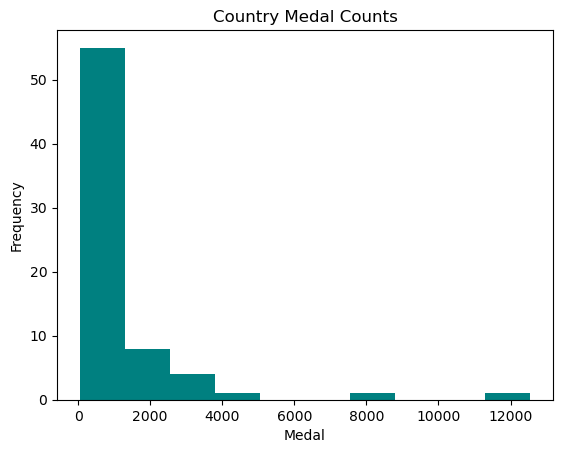

In [11]:
# Computing the medal count per country
medal_freq = olympic_gms_b.groupby('NOC')['Medal'].sum()

# Create histogram of medal counts
plt.hist(medal_freq, bins=10,color='teal')
plt.title('Country Medal Counts')
plt.xlabel('Medal')
plt.ylabel('Frequency')
plt.show()

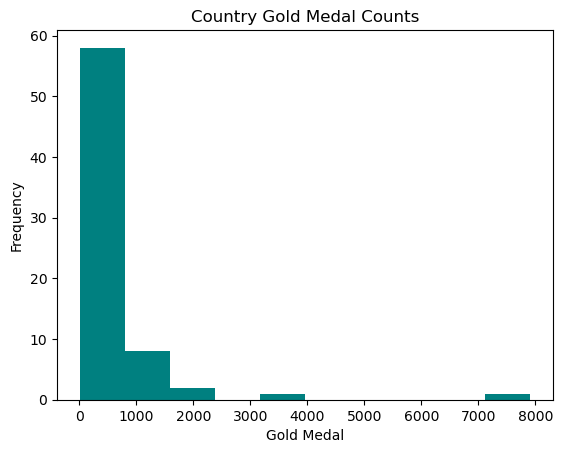

In [12]:
# Computing the gold medal count per country
gold_count = olympic_gms_b.loc[olympic_gms_b['Medal'] == 3].groupby('NOC')['Medal'].sum()

# Create histogram of medal counts
plt.hist(gold_count, bins=10,color='teal')
plt.title('Country Gold Medal Counts')
plt.xlabel('Gold Medal')
plt.ylabel('Frequency')
plt.show()

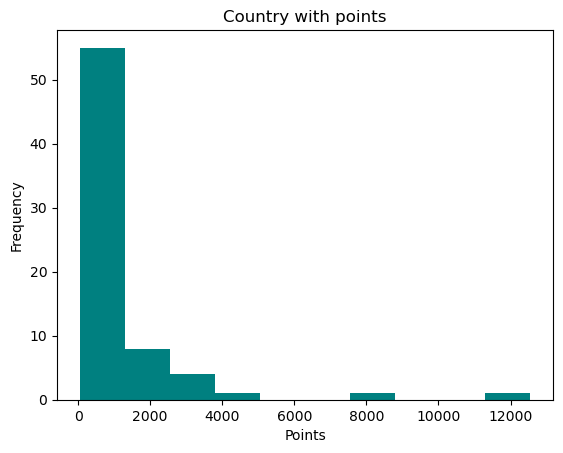

In [13]:
# Computing the points per country
olympic_gms_b1 = olympic_gms_b.copy()
olympic_gms_b1['Points'] = olympic_gms_b1['Medal'].map({3: 3, 2: 2, 1: 1})
points_count = olympic_gms_b1.groupby('NOC')['Points'].sum()

# Create histogram of points
plt.hist(points_count, bins=10,color='teal')
plt.title('Country with points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Q1 - (c) 
Using Matplotlib:

(i) Create a bar chart of the number of medals for each sex.

(ii) Create a bar chart of the number of medals for each season.

(iii) Create a histogram of the frequency of the athletes age.

(iv) Create a histogram of the frequency of the athletes height.

(v) Create a histogram of the frequency of the athletes weight.

Text(0.5, 1.0, 'Bar Chart of Number of Medals for Each Sex')

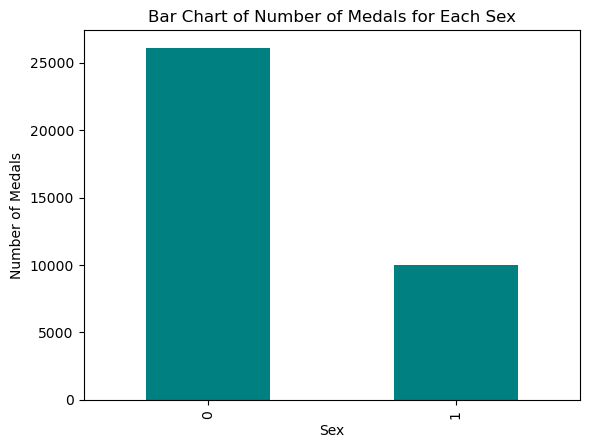

In [14]:
# Creating the bar chart of #medals for each sex

olympic_gms1.Sex.value_counts().plot(kind='bar',color='teal')

# Add labels and title to the bar chart
plt.xlabel('Sex')
plt.ylabel('Number of Medals')
plt.title('Bar Chart of Number of Medals for Each Sex')

Text(0.5, 1.0, 'Bar Chart of Number of Medals for Each Season')

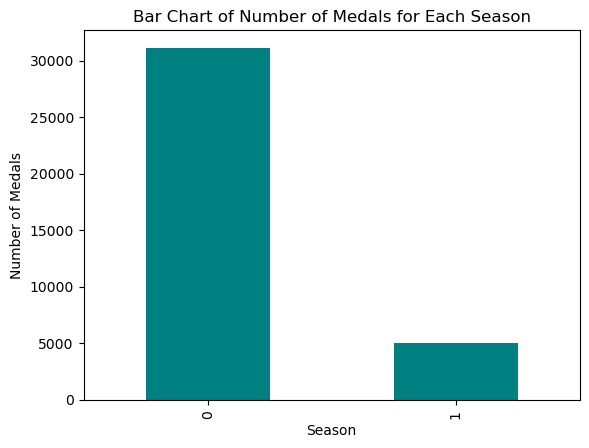

In [15]:
# Creating the bar chart of #medals for each season
olympic_gms1.Season.value_counts().plot(kind='bar',color='teal')

# Add labels and title to the bar chart
plt.xlabel('Season')
plt.ylabel('Number of Medals')
plt.title('Bar Chart of Number of Medals for Each Season')

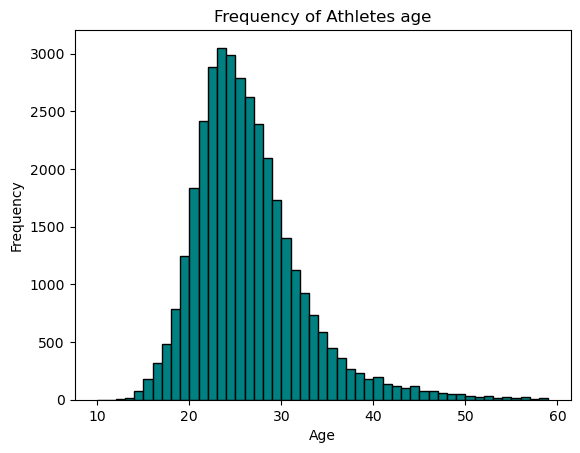

In [16]:
# Creating histogram for the frequency of athletes age
olympic_gms1['Age'].plot(kind='hist',bins=range(10,60),color = 'teal',ec = 'black')

# Add labels and title to the bar chart
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes age')
plt.show()

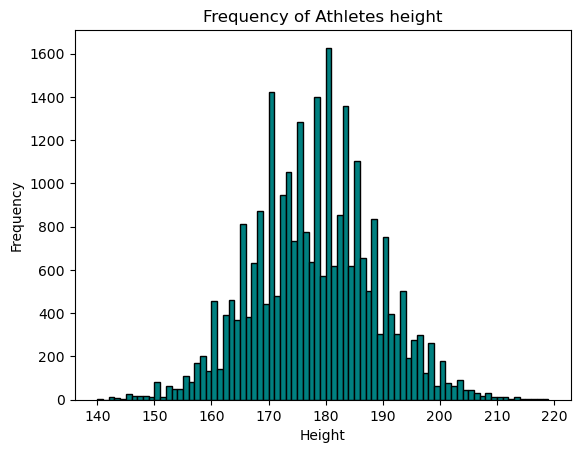

In [17]:
# Creating histogram for the frequency of athletes height
olympic_gms1['Height'].plot(kind='hist',bins=range(140,220),color = 'teal',ec = 'black')

# Add labels and title to the bar chart
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes height')
plt.show()

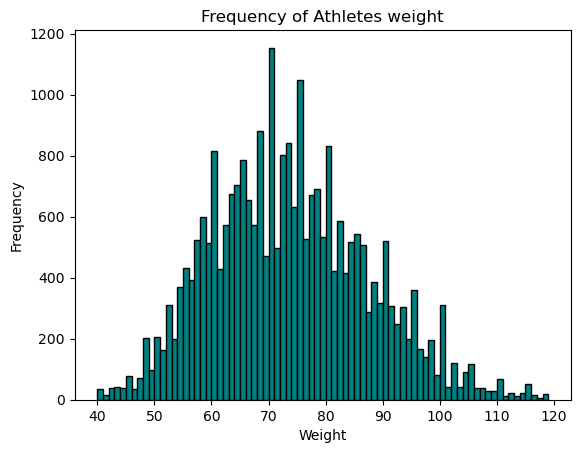

In [18]:
# Creating histogram for the frequency of athletes weight
olympic_gms1['Weight'].plot(kind='hist',bins=range(40,120),color = 'teal',ec = 'black')

# Add labels and title to the bar chart
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes weight')
plt.show()

# Q1 - (d)

Remove all the rows which have ‘NaN’ in the ‘Height’ or ‘Weight’ columns.
Make a scatter plot of ‘Weight” and ‘Height’ and colour the points using
‘Sex”. Create a new column called ‘BMI’ equal to the ‘Weight’ divided by
the (‘Height”/100)2
. Make a scatter plot of ‘BMI’ and ‘Weight’ and colour
the points using ‘Sex’. Create a correlation matrix and discuss your results.

In [19]:
# remove rows with NaN values in the Height and Weight columns
olympic_gms_d = olympic_gms_b.dropna(subset=['Height', 'Weight'])

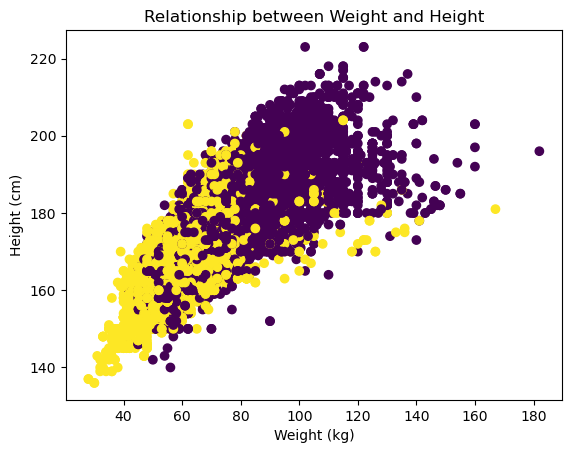

In [20]:
# create a scatter plot of Weight and Height
plt.scatter(olympic_gms_d['Weight'], olympic_gms_d['Height'], c=olympic_gms_d['Sex'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Relationship between Weight and Height')
plt.show()

In [21]:
# create a new column for BMI
olympic_gms_d['BMI'] = olympic_gms_d['Weight'] / (olympic_gms_d['Height'] / 100) ** 2

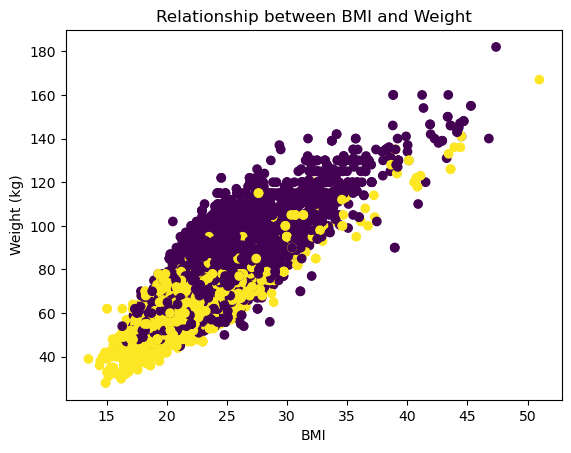

In [22]:
# create a scatter plot of BMI and Weight
plt.scatter(olympic_gms_d['BMI'], olympic_gms_d['Weight'], c=olympic_gms_d['Sex'])
plt.xlabel('BMI')
plt.ylabel('Weight (kg)')
plt.title('Relationship between BMI and Weight')
plt.show()

In [23]:
# create a correlation matrix for all columns
corr_mat = olympic_gms_d.corr()
print(corr_mat)

             Sex       Age    Height    Weight      Year    Season     Medal  \
Sex     1.000000 -0.118879 -0.470853 -0.502817  0.252534  0.010973 -0.009598   
Age    -0.118879  1.000000  0.096922  0.158269  0.112662  0.043224 -0.013592   
Height -0.470853  0.096922  1.000000  0.803173  0.025421 -0.080258  0.037632   
Weight -0.502817  0.158269  0.803173  1.000000  0.015696 -0.027479  0.023186   
Year    0.252534  0.112662  0.025421  0.015696  1.000000  0.107219 -0.033639   
Season  0.010973  0.043224 -0.080258 -0.027479  0.107219  1.000000 -0.009207   
Medal  -0.009598 -0.013592  0.037632  0.023186 -0.033639 -0.009207  1.000000   
BMI    -0.364814  0.170008  0.330621  0.821515 -0.011399  0.039627 -0.000261   

             BMI  
Sex    -0.364814  
Age     0.170008  
Height  0.330621  
Weight  0.821515  
Year   -0.011399  
Season  0.039627  
Medal  -0.000261  
BMI     1.000000  


# Q1 - (e) 
When ‘Sex’ equals 0, remove all rows with ‘Age’ greater than 43, or ‘Age’ less
than 18, or ‘Height’ less than 158, or ‘Height’ greater than 205, or ‘Weight’
less than 52 or ‘Weight’ greater than 120. When ‘Sex’ equals 1, remove all
rows with ‘Age’ greater than 39, or ‘Age’ less than 15, or ”Height” less than
148, or ‘Height’ greater than 193, or ‘Weight’ less than 40 or ”Weight” greater
than 94.

Remove rows with ‘Year’s less than 1948 and remove ‘Season’s equal
to 1. Remove the ‘Season’ column. 

Now remove ‘Sports’ which have less than
200 medals. 

Using Matplotlib make a bar chart of the number of medals in
each ‘Sport’. Comment on this. 

Now remove the ‘Events’ column. Name your
dataframe ‘dfe’.

In [24]:
# filter rows based on Age, Height, Weight 
olympic_gms_e = olympic_gms_d[
    ((olympic_gms_d['Sex'] == 0) & (olympic_gms_d['Age'].between(18, 43)) & (olympic_gms_d['Height'].between(158, 205)) & (olympic_gms_d['Weight'].between(52, 120))) |
    ((olympic_gms_d['Sex'] == 1) & (olympic_gms_d['Age'].between(15, 39)) & (olympic_gms_d['Height'].between(148, 193)) & (olympic_gms_d['Weight'].between(40, 94)))
]

In [25]:
olympic_gms_e1 = olympic_gms_e[(olympic_gms_e['Year'] >= 1948) & (olympic_gms_e['Season'] != 1)]
olympic_gms_e1.drop('Season', axis=1, inplace = True)

In [26]:
olympic_gms_e2 = olympic_gms_e1.groupby('Sport').filter(lambda x: len(x) > 200)

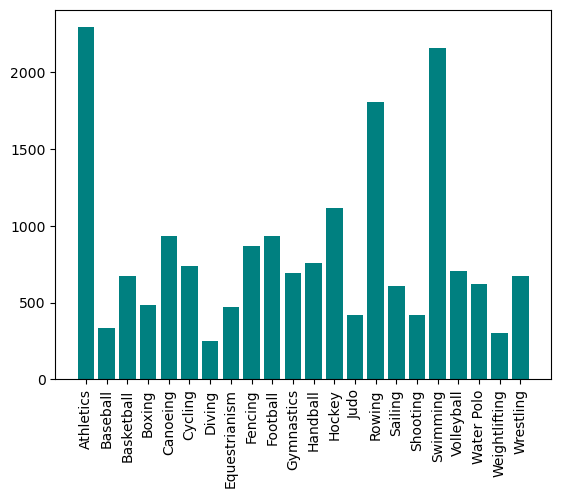

In [27]:
medals_per_sport = olympic_gms_e2.groupby('Sport')['Medal'].count()
plt.bar(medals_per_sport.index, medals_per_sport.values,color="teal")
plt.xticks(rotation=90)
plt.show()

In [28]:
# remove the Events column and rename the DataFrame to 'dfe'
dfe = olympic_gms_e2.drop('Event', axis=1)

# Removing NA from dfe
dfe = dfe.dropna()

dfe1 = dfe.copy()
#print(dfe.dtypes)
#dfe

# Q1 - (f) 
Normalise the ‘Age’, ‘Height’, ‘Weight’, ‘Year’, ‘Medal’ and ‘BMI’ columns.
In this part of the question just consider the case when the ‘Sport’ equals
‘Baseball’. You should split the data into (80%) training data and (20%)
test data. Use an appropriate linear model from sklearn to predict ‘NOC’
using the normalised values ‘Sex’, ‘Age’, ‘Height’, ‘Weight’, ‘Year’, ‘Medal’
and ‘BMI’. Test your model using the test data set. Comment on your results.

In [29]:
#Normalizing columns
cols_to_normalize = ['Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']

scaler = MinMaxScaler()
dfe1[cols_to_normalize] = scaler.fit_transform(dfe1[cols_to_normalize])

In [30]:
olympic_gms_f = dfe1.loc[dfe1['Sport'] == 'Baseball']

In [31]:
#split data into test & train
X = olympic_gms_f[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']]
y = olympic_gms_f['NOC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
#using logistic regression as a model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
#finding the accuracy score
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score is: {accuracy}")

Accuracy score is: 0.5373134328358209


## Comments
A higher accuracy score indicates that our model is performing better.
We should be aware, nevertheless, that the accuracy score may not always be an accurate indicator of the model's performance. For instance, in unbalanced data sets with a dominant class, the model may perform well by exclusively predicting the dominant class. The model may be correctly forecasting the NOC values if the accuracy score is high. The model needs to be adjusted or we should attempt different models if the accuracy score is low, on the other hand.

# Q1 - (g)
Try to predict ‘NOC’ when the ‘Sport’ column is ‘Baseball’. Now split the data into (80%) training data and (20%) test data. Create
any regression model you like using PyTorch, select an appropriate criterion,
optimisation algorithm, and learning rate. Train the model and report the
training error. Comment on the testing error.

In [34]:
torch_mod = dfe1[dfe1['Sport'] == 'Baseball']
X = torch_mod[['Sex', 'Age', 'Height', 'Weight', 'Year', 'BMI']]
y = torch_mod['NOC']
encod = LabelEncoder()
y = encod.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
class ClassificationModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = ClassificationModel(6, len(np.unique(y)))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [36]:
# Define data loader for training set
train_set = torch.utils.data.TensorDataset(torch.from_numpy(X_train.values).float(),
                                           torch.from_numpy(y_train).long())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=42, shuffle=True)

# Define data loader for test set
test_set = torch.utils.data.TensorDataset(torch.from_numpy(X_test.values).float(),
                                          torch.from_numpy(y_test).long())
test_loader = torch.utils.data.DataLoader(test_set, batch_size=42, shuffle=False)

# Training loop
for epoch in range(10):  # Set number of epochs
    # Training
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_set)
    train_acc /= len(train_set)

    # Evaluation
    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        val_acc += (predicted == labels).sum().item()

    val_loss /= len(test_set)
    val_acc /= len(test_set)

    # Print metrics
    print('Epoch [{}/{}], Loss: {:.4f}, Val Acc: {:.2f}%'
          .format(epoch+1, 10,val_loss, val_acc*100))

Epoch [1/10], Loss: 1.8238, Val Acc: 29.85%
Epoch [2/10], Loss: 1.8231, Val Acc: 29.85%
Epoch [3/10], Loss: 1.8224, Val Acc: 29.85%
Epoch [4/10], Loss: 1.8217, Val Acc: 29.85%
Epoch [5/10], Loss: 1.8210, Val Acc: 29.85%
Epoch [6/10], Loss: 1.8203, Val Acc: 29.85%
Epoch [7/10], Loss: 1.8197, Val Acc: 29.85%
Epoch [8/10], Loss: 1.8189, Val Acc: 29.85%
Epoch [9/10], Loss: 1.8182, Val Acc: 29.85%
Epoch [10/10], Loss: 1.8175, Val Acc: 29.85%


# Q1 - (h) 
Using your dataset obtained in Q1(e), create a new dataframe called ‘new df’.
Create a list called ‘Rownames’ using the 69 ‘NOC’ values which you will use
as the row names. Create a list called ‘Columnames’ using the 22 ‘Sport’
values which you will use as the column names. The values in ‘new df’ should
represent the total number of points (i.e. the total of the ‘Medal’ number) each
‘NOC’ gets in each ‘Sport’. Obtain the correlation matrix of ‘new df’. Discuss
your results. Write ‘new df’ to a csv file and read this into R. In R, create 4
different plots to illustrate some statistical properties of ‘new df’. Discuss any
significant results.

In [37]:
# create a pivot table to get the total number of medals per NOC and sport
new_df = dfe.pivot_table(index='NOC', columns='Sport', values='Medal', aggfunc='sum', fill_value=0)

In [38]:
# create list of row names
Rownames = dfe['NOC'].unique().tolist()
# create list of column names
Columnames = dfe['Sport'].unique().tolist()

In [39]:
# writing dfe as .csv file (for using in R)
new_df.to_csv('new_df.csv')

In [40]:
# set row and column names
new_df.index = Rownames
new_df.columns = Columnames

In [41]:
corr_matrix = new_df.corr()
# corr_matrix

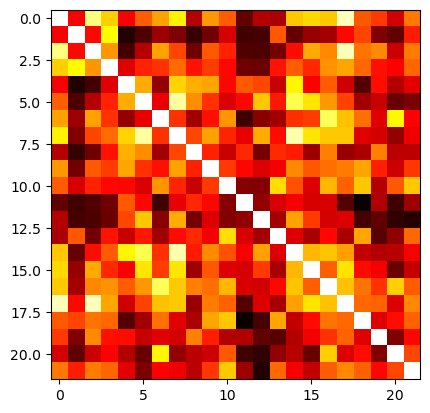

In [42]:
plt.imshow(corr_matrix,cmap = 'hot',interpolation = 'nearest')
plt.show()

# Q2 - (a) 
Read in the csv file ‘Gross Domestic Product.csv’ to create the dataframe
‘gdp df’. Create a column named ‘NOC’ which takes the values of ‘Code’.
Now remove the columns named ‘Entity’ and ‘Code’. In the ‘NOC’ column,
change all ‘DEU’s to ‘GER’ and remove all the rows which have ‘NOC’ equals
‘RUS’. Now make sure that your dataframes ‘gdp df” and ‘dfe’ have the same
values of ‘NOC’ and ‘Year’ and remove rows with different values of ‘NOC’ or
different values of ‘Year’. Remove the columns ‘Sex’, ‘Sport’, ‘Age’, ‘Height’,
‘Weight’ and ‘BMI’ from ‘dfe’.

In [43]:
# importing new data
gdp_df = pd.read_csv("Gross_Domestic_Product.csv")

In [44]:
# creating a new column named 'NOC' using the 'Code' column values
gdp_df['NOC'] = gdp_df['Code']

In [45]:
# remove the 'Entity' and 'Code' columns
gdp_df = gdp_df.drop(['Entity', 'Code'], axis=1)

In [46]:
# replacing all 'DEU' values in 'NOC' column with 'GER'
gdp_df['NOC'] = gdp_df['NOC'].replace('DEU', 'GER')

# removing all rows where 'NOC' not equals 'RUS'
gdp_df = gdp_df[gdp_df['NOC'] != 'RUS']

In [47]:
# remove columns 'Sex', 'Sport', 'Age', 'Height', 'Weight', and 'BMI' from 'dfe'
dfe = dfe.drop(['Sex', 'Sport', 'Age', 'Height', 'Weight', 'BMI'], axis=1)

In [48]:
# Make sure that 'gdp_df' and 'dfe' have the same values of 'NOC' and 'Year'
dfe = dfe[(dfe['NOC'].isin(gdp_df['NOC'])) & (dfe['Year'].isin(gdp_df['Year']))]
gdp_df = gdp_df[(gdp_df['NOC'].isin(dfe['NOC'])) & (gdp_df['Year'].isin(dfe['Year']))]

# Q2 - (b) 
Read in the csv file ‘Demographic Indicators.csv’ to create the dataframe
‘dmg df”. Rename the columns ‘ISO3 code’ as ‘NOC’, ‘Time” as ‘Year’ and
‘TPopulation1July’ as ‘Population’. In the ‘NOC’ column, change all ‘DEU’s
to ’GER’ and remove all the rows which have ‘NOC’ equals ‘RUS’. Now make
sure that your dataframes ‘dmg df’ and ‘dfe’ have the same values of ‘NOC’
and ‘Year’ and remove rows with different values of ‘NOC’ or different values
of ‘Year’. Combine ‘dfe’, ‘gdp df’ and ‘dmg df’ into a single dataframe called
‘com df’. Remove any rows with missing values. Don’t forget to reset the
index.

In [49]:
# importing new data
dmg_df = pd.read_csv("Demographic_indicators.csv")

In [50]:
# renaming columns
dmg_df = dmg_df.rename(columns={'ISO3_code': 'NOC', 'Time': 'Year', 'TPopulation1July': 'Population'})

In [51]:
# replacing NOCs
dmg_df['NOC'] = dmg_df['NOC'].replace('DEU', 'GER')

# removing NOC not equals RUS
dmg_df = dmg_df[dmg_df['NOC'] != 'RUS']

In [52]:
# Make sure that 'dmg_df' and 'dfe' have the same values of 'NOC' and 'Year'
dmg_df = dmg_df[(dmg_df['NOC'].isin(dfe['NOC'])) & (dmg_df['Year'].isin(dfe['Year']))]
# dmg_df

In [53]:
# Create a new DataFrame called 'com_df' by combining 'dfe', 'gdp_df', and 'dmg_df'
com_df1 = pd.merge(dfe, gdp_df, on=['NOC', 'Year'])
com_df = pd.merge(com_df1, dmg_df, on=['NOC', 'Year'])

In [54]:
# Removing rows with missing values
com_df = com_df.dropna()

In [55]:
# Resetting the index
com_df = com_df.reset_index(drop=True)
com_df.drop_duplicates(inplace = True)

In [56]:
# removing unwanted columns from com_df 
com_df = com_df.drop(['SortOrder','Location','TPopulation1Jan','TPopulationMale1July','TPopulationFemale1July','PopDensity','PopSexRatio','MedianAgePop','NatChange','NatChangeRT','PopChange','PopGrowthRate','DoublingTime','Births','Births1519','CBR','TFR','NRR','MAC','SRB','Deaths','DeathsMale','DeathsFemale','CDR','LEx','LExMale','LExFemale','LE15','LE15Male','LE15Female','LE65','LE65Male','LE65Female','LE80','LE80Male','LE80Female','InfantDeaths','IMR','LBsurvivingAge1','Under5Deaths','Q5','Q0040','Q0040Male','Q0040Female','Q0060','Q0060Male','Q0060Female','Q1550','Q1550Male','Q1550Female','Q1560','Q1560Male','Q1560Female','NetMigrations','CNMR'], axis=1)

#making a copy of com_df

com_df1 = com_df.copy()
#com_df

# Q2- (c) 
Replace each value in the columns ‘GDP’, ‘Population’ and ‘Medal’ by its
logarithm to base e. Then normalise the columns ‘GDP’, ‘Population’ and
‘Medal’ for each ‘Year’. Now split the data into (80%) training data and
(20%) test data. Use an appropriate linear model from sklearn to predict
the number of points given in the column ‘Medal’ using the normalised values
‘GDP’ and ‘Population’. Test your model using the test data set. Discuss
your results

In [57]:
# Creating GDP_Population column
com_df1['GDP_Population'] = com_df1['GDP'] * com_df1['Population']

# Removing the outliers from data
com_df1 = com_df1[com_df1['Medal'] <= 15]

# Log transforming the columns
com_df1[['GDP', 'Population', 'Medal']] = np.log(com_df1[['GDP', 'Population', 'Medal']])

# Normalise the columns 'GDP', 'Population', and 'GDP_Population' for each 'Year'
com_df1[['GDP', 'Population', 'GDP_Population']] = com_df1.groupby('Year')[['GDP', 'Population', 'GDP_Population']].apply(lambda x: (x - x.mean()) / x.std())


In [58]:
# Split the data into training (80%) and test (20%) sets
X = com_df1[['GDP', 'Population', 'GDP_Population']]
y = com_df1['Medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
# Scale the features
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

# Train the Ridge regression model on the training dataset
rid_reg = Ridge(alpha=1)
rid_reg.fit(X_train_scal, y_train)

# Predict the values for the test dataset
y_pred = rid_reg.predict(X_test_scal)

In [60]:
# Calculate the root mean squared error (RMSE), mean squared error (MSE) and R-squared value for the predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.2156535565680246
RMSE: 0.46438513818599386


## Comments

The standard deviation of the model's errors in its predictions is represented by the root mean squared error (RMSE). It calculates the discrepancy between expected and actual data. The performance of the model is improved by a reduced RMSE value.

The average of the squared mistakes the model produced in its predictions is shown by the term mean squared error (MSE). Although it lacks the square root function, it is comparable to RMSE. The model performs better the lower the MSE value is.